* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов


In [125]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
data=load_iris()
# data
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

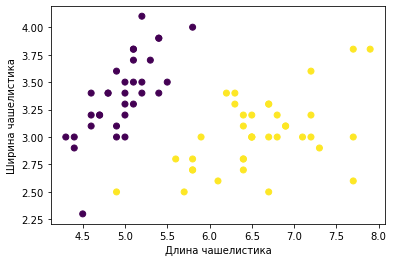

<ipython-input-127-b3cd3c3b5430>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


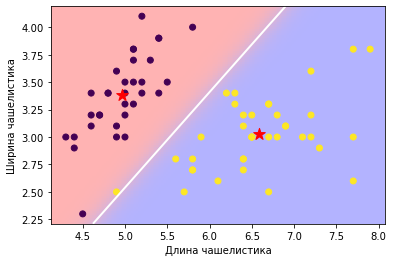

In [127]:
df_iris=pd.DataFrame(data['data'],columns=data['feature_names'])
iris_variety=data['target']
df_iris=df_iris.drop(['petal length (cm)','petal width (cm)'],axis=1)
df_iris['iris_variety']=data['target']
df_iris.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width'},inplace=True)
df_iris=df_iris[(iris_variety==2) | (iris_variety==0)]
X = df_iris[['sepal_length','sepal_width']]
y = iris_variety[(iris_variety==2)|(iris_variety==0)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
# print(result)
accuracy_score(y_test, lda.predict(X_test))
ax=plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
matplotlib.pyplot.ylabel('Ширина чашелистика')
matplotlib.pyplot.xlabel('Длина чашелистика')
plt.show()
# lda.coef_
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
matplotlib.pyplot.ylabel('Ширина чашелистика')
matplotlib.pyplot.xlabel('Длина чашелистика')
plt.show()

* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

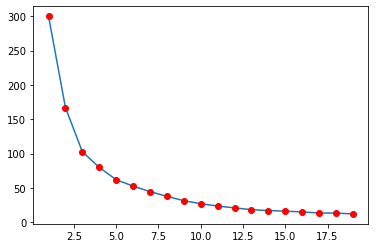

Судя по графику локтя здесь 3 группы


In [94]:
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.show()
print("Судя по графику локтя здесь 3 группы.")

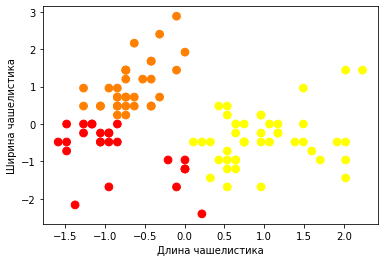

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)
matplotlib.pyplot.ylabel('Ширина чашелистика')
matplotlib.pyplot.xlabel('Длина чашелистика')
plt.show()